In [38]:
import pandas as pd # pandas import
# excel_exam.xlsx 파일 읽어오기
exam = pd.read_excel("../Data/excel_exam.xlsx")
exam

id  nclass  math  english  science
0    1       1    50       98       50
1    2       1    60       97       60
2    3       1    45       86       78
3    4       1    30       98       58
4    5       2    25       80       65
5    6       2    50       89       98
6    7       2    80       90       45
7    8       2    90       78       25
8    9       3    20       98       15
9   10       3    50       98       45
10  11       3    65       65       65
11  12       3    45       85       32
12  13       4    46       98       65
13  14       4    48       87       12
14  15       4    75       56       78
15  16       4    58       98       65
16  17       5    65       68       98
17  18       5    80       78       90
18  19       5    89       68       87
19  20       5    78       83       58

In [48]:
# built in function
sum(exam['math'])

# dataframe function
exam['math'].count()

math_avg = sum(exam['math']) / exam['math'].count()
math_mean = exam.mean()
print("excel_exam.xlsx의 math 성적 평균은 :", math_avg)

excel_exam.xlsx의 math 성적 평균은 : 57.45


In [44]:
result = exam[['math', 'english', 'science']] > 50
result.sum()

math       10
english    20
science    13
dtype: int64

In [52]:
exam.shape # 열 개수, 행 개수 출력 ()는 입력하지 않음
exam.info() # 조금 더 상세하게 볼 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes


In [54]:
exam.describe() # 표준편차(standard deviation)
# 표준편차가 크다면, 평균에 가까운 것. 작다면, 분포가 넓은 것

id     nclass       math    english    science
count  20.00000  20.000000  20.000000  20.000000  20.000000
mean   10.50000   3.000000  57.450000  84.900000  59.450000
std     5.91608   1.450953  20.299015  12.875517  25.292968
min     1.00000   1.000000  20.000000  56.000000  12.000000
25%     5.75000   2.000000  45.750000  78.000000  45.000000
50%    10.50000   3.000000  54.000000  86.500000  62.500000
75%    15.25000   4.000000  75.750000  98.000000  78.000000
max    20.00000   5.000000  90.000000  98.000000  98.000000

In [80]:
mpg_original = pd.read_csv('../Data/mpg.csv')
mpg = mpg_original.copy()
mpg.describe(include='all')
mpg.head(1)

manufacturer model  displ  year  cyl     trans drv  cty  hwy fl category
0         audi    a4    1.8  1999    4  auto(l5)   f   18   29  p  compact

In [90]:
mpg = mpg.rename(columns = { 'cty' : '도심 연비', 
                       'hwy' : '고속도로 연비'})

In [92]:
mpg.head(1)
mpg.rename(columns = {'year' : '출시년도'}, inplace=True)

In [94]:
# 자동차를 산다. 연비가 좋은 거. 도심 & 고속도로 연비 둘다 좋은 것 -> 평균값 높은 것
mpg.head(1)

manufacturer model  displ  출시년도  cyl     trans drv  도심 연비  고속도로 연비 fl  \
0         audi    a4    1.8  1999    4  auto(l5)   f     18       29  p   

  category  
0  compact

In [100]:
mpg['total'] = (mpg['도심 연비'] + mpg['고속도로 연비']) / 2
mpg.head(1)
# 1. 기존 컬럼의 사칙연산으로 파생변수 생성
# 2. 조건문을 이용해서 파생변수 생성 = if(조건1)
# 3. 중첩된 조건 = 여러 개 조건이 중첩된 경우
# 4. 조건 여러 개 같이 - 조건1 & 조건2 & 조건3
import numpy as np
# total 연비가 25보다 크면 pass, 그렇지 않으면 fail
mpg['test'] = np.where(mpg['total'] > 25, 'pass', 'fail')
mpg

manufacturer   model  displ  출시년도  cyl       trans drv  도심 연비  고속도로 연비 fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f     18       29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f     21       29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f     20       31  p   
3           audi      a4    2.0  2008    4    auto(av)   f     21       30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f     16       26  p   
..           ...     ...    ...   ...  ...         ...  ..    ...      ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f     19       28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f     21       29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f     16       26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f     18       26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f     17       26  p   

    category  total  test  
0    compact   23.5  fail  
1    compact   25.0  fail  
2    compact   25.5  pass  
3    compact   25.5  pass  
4    compact   21.0  fail  
..       ...    ...   ...  
229  midsize   23.5  fail  
230  midsize   25.0  fail  
231  midsize   21.0  fail  
232  midsize   22.0  fail  
233  midsize   21.5  fail  

[234 rows x 13 columns]

In [104]:
# 3. 중첩된 조건 = 여러 개 조건이 중첩된 경우
# 30보다 큰 연비 - mpg['total'] > 30 - A
# 20보다 크고, 30보다 작은 연비 - 20 < mpg['total'] < 30 - B
# 20보다 작은 연비 - mpg['total'] < 20 - C
mpg['grade'] = np.where(mpg['total'] > 30, 'A', 
               np.where(mpg['total'] > 20, 'B', 
               np.where(mpg['total'] > 10, 'C', 'D')))
mpg.head(1)

manufacturer model  displ  출시년도  cyl     trans drv  도심 연비  고속도로 연비 fl  \
0         audi    a4    1.8  1999    4  auto(l5)   f     18       29  p   

  category  total  test grade  
0  compact   23.5  fail     B

In [108]:
# 4. 조건 여러 개 같이 - 조건1 & 조건2 & 조건3
mpg['size'] = np.where((mpg['category'] == 'compact') |
                       (mpg['category'] == '2seater') |
                       (mpg['category'] == 'midsize') , 'small', 'big')
# mpg['category'].unique() # 종류 보는 법
mpg.head(1)

manufacturer model  displ  출시년도  cyl     trans drv  도심 연비  고속도로 연비 fl  \
0         audi    a4    1.8  1999    4  auto(l5)   f     18       29  p   

  category  total  test grade   size  
0  compact   23.5  fail     B  small

In [110]:
mpg['size2'] = np.where(mpg['category'].isin(['compact', 'midsize', '2seater']),
                        'small', 'big')
mpg.head(1)

manufacturer model  displ  출시년도  cyl     trans drv  도심 연비  고속도로 연비 fl  \
0         audi    a4    1.8  1999    4  auto(l5)   f     18       29  p   

  category  total  test grade   size  size2  
0  compact   23.5  fail     B  small  small

In [171]:
# pd.set_option('display.max_rows', None) # 모든 row를 보여달라
pd.set_option('display.max_rows', 10) # 10개의 row를 보여달라
pd.set_option('display.max_columns', None) # 모든 row를 보여달라
mpg

manufacturer   model  displ  출시년도  cyl       trans drv  도심 연비  고속도로 연비 fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f     18       29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f     21       29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f     20       31  p   
3           audi      a4    2.0  2008    4    auto(av)   f     21       30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f     16       26  p   
..           ...     ...    ...   ...  ...         ...  ..    ...      ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f     19       28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f     21       29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f     16       26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f     18       26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f     17       26  p   

    category  total  test grade   size  size2  
0    compact   23.5  fail     B  small  small  
1    compact   25.0  fail     B  small  small  
2    compact   25.5  pass     B  small  small  
3    compact   25.5  pass     B  small  small  
4    compact   21.0  fail     B  small  small  
..       ...    ...   ...   ...    ...    ...  
229  midsize   23.5  fail     B  small  small  
230  midsize   25.0  fail     B  small  small  
231  midsize   21.0  fail     B  small  small  
232  midsize   22.0  fail     B  small  small  
233  midsize   21.5  fail     B  small  small  

[234 rows x 16 columns]

<Axes: xlabel='grade'>

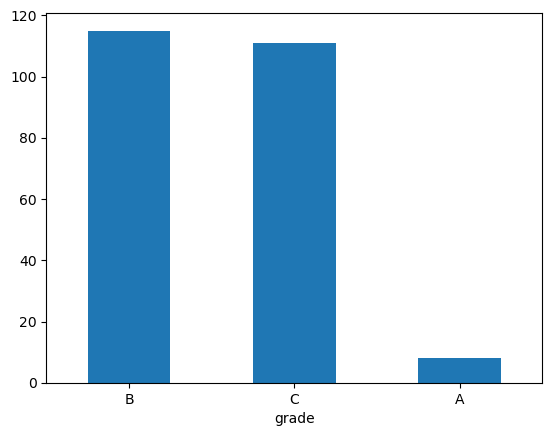

In [124]:
# mpg['grade'].unique()
mpg['grade'].value_counts().plot.bar(rot = 0)

# import seaborn as sns
# sns.countplot()

In [163]:
# query() 사용해보기
# - row를 줄이는 과정!
import pandas as pd
exam = pd.read_csv('../Data/exam.csv')
exam.query("nclass == 1")
# 조건 여러 개 & |
exam.query("english > 70 & science > 80")
# column 줄이기
# exam[['math', 'english']]
# row, column 둘다 줄이기
exam.query("english > 70 | science > 80")[['science', 'english', 'id']]\
        .query("science > 70")[['id', 'science']]\
            .query('science > 80')
# \(역슬래시)를 쓰면 다음 줄과 연결된다는 뜻. \ 뒤에는 띄어쓰기, 주석 넣으면 안됨!
mpg.query("grade == 'A'")[['manufacturer', 'model', 'total']]\
        .query('total > 35')

manufacturer       model  total
212   volkswagen       jetta   38.5
221   volkswagen  new beetle   39.5

In [194]:
midwest = pd.read_csv('../Data/midwest.csv')
midwest.head(5)

PID     county state   area  poptotal   popdensity  popwhite  popblack  \
0  561      ADAMS    IL  0.052     66090  1270.961540     63917      1702   
1  562  ALEXANDER    IL  0.014     10626   759.000000      7054      3496   
2  563       BOND    IL  0.022     14991   681.409091     14477       429   
3  564      BOONE    IL  0.017     30806  1812.117650     29344       127   
4  565      BROWN    IL  0.018      5836   324.222222      5264       547   

   popamerindian  popasian  popother  percwhite  percblack  percamerindan  \
0             98       249       124  96.712059   2.575276       0.148283   
1             19        48         9  66.384340  32.900433       0.178807   
2             35        16        34  96.571276   2.861717       0.233473   
3             46       150      1139  95.254171   0.412257       0.149322   
4             14         5         6  90.198766   9.372858       0.239890   

   percasian  percother  popadults    perchsd  percollege  percprof  \
0   0.376759   0.187623      43298  75.107395   19.631392  4.355859   
1   0.451722   0.084698       6724  59.726353   11.243308  2.870315   
2   0.106731   0.226803       9669  69.334988   17.033819  4.488572   
3   0.486918   3.697332      19272  75.472188   17.278954  4.197800   
4   0.085675   0.102810       3979  68.861523   14.475999  3.367680   

   poppovertyknown  percpovertyknown  percbelowpoverty  percchildbelowpovert  \
0            63628         96.274777         13.151443             18.011717   
1            10529         99.087145         32.244278             45.826514   
2            14235         94.956974         12.068844             14.036061   
3            30337         98.477569          7.209019             11.179536   
4             4815         82.505140         13.520249             13.022889   

   percadultpoverty  percelderlypoverty  inmetro category  
0         11.009776           12.443812        0      AAR  
1         27.385647           25.228976        0      LHR  
2         10.852090           12.697410        0      AAR  
3          5.536013            6.217047        1      ALU  
4         11.143211           19.200000        0      AAR

In [192]:
midwest.shape

(437, 29)

In [196]:
# 전체 인구 수 poptotal -> total로 변환
midwest = midwest.rename(columns={'poptotal' : 'total'})
# 아시아계 인구수 popasian -> asian으로 변환
midwest = midwest.rename(columns={'popasian' : 'asian'})
# 전체 인구 대비 아시안 계 인구 수 백분율 분석
midwest['rate'] = (midwest['asian'] / midwest['total']) * 100
midwest.head(5)

PID     county state   area  total   popdensity  popwhite  popblack  \
0  561      ADAMS    IL  0.052  66090  1270.961540     63917      1702   
1  562  ALEXANDER    IL  0.014  10626   759.000000      7054      3496   
2  563       BOND    IL  0.022  14991   681.409091     14477       429   
3  564      BOONE    IL  0.017  30806  1812.117650     29344       127   
4  565      BROWN    IL  0.018   5836   324.222222      5264       547   

   popamerindian  asian  popother  percwhite  percblack  percamerindan  \
0             98    249       124  96.712059   2.575276       0.148283   
1             19     48         9  66.384340  32.900433       0.178807   
2             35     16        34  96.571276   2.861717       0.233473   
3             46    150      1139  95.254171   0.412257       0.149322   
4             14      5         6  90.198766   9.372858       0.239890   

   percasian  percother  popadults    perchsd  percollege  percprof  \
0   0.376759   0.187623      43298  75.107395   19.631392  4.355859   
1   0.451722   0.084698       6724  59.726353   11.243308  2.870315   
2   0.106731   0.226803       9669  69.334988   17.033819  4.488572   
3   0.486918   3.697332      19272  75.472188   17.278954  4.197800   
4   0.085675   0.102810       3979  68.861523   14.475999  3.367680   

   poppovertyknown  percpovertyknown  percbelowpoverty  percchildbelowpovert  \
0            63628         96.274777         13.151443             18.011717   
1            10529         99.087145         32.244278             45.826514   
2            14235         94.956974         12.068844             14.036061   
3            30337         98.477569          7.209019             11.179536   
4             4815         82.505140         13.520249             13.022889   

   percadultpoverty  percelderlypoverty  inmetro category      rate  
0         11.009776           12.443812        0      AAR  0.376759  
1         27.385647           25.228976        0      LHR  0.451722  
2         10.852090           12.697410        0      AAR  0.106731  
3          5.536013            6.217047        1      ALU  0.486918  
4         11.143211           19.200000        0      AAR  0.085675

In [187]:
midwest[['county', 'state', 'total', 'asian', 'rate']].head()

county state  total  asian      rate
0      ADAMS    IL  66090    249  0.376759
1  ALEXANDER    IL  10626     48  0.451722
2       BOND    IL  14991     16  0.106731
3      BOONE    IL  30806    150  0.486918
4      BROWN    IL   5836      5  0.085675

<Axes: ylabel='Frequency'>

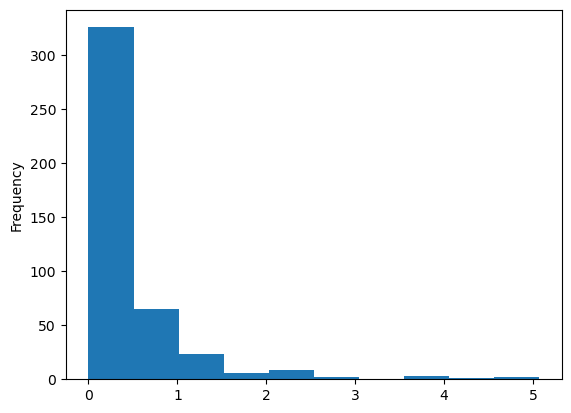

In [189]:
# 전체 인구 수 대비 아시아계 인구 수 백분율 빈도수 확인
midwest['rate'].plot.hist()

In [200]:
# 전체 인구 대비 아시아 인구 백분율 요약 통계 구하기
midwest['rate'].describe()

count    437.000000
mean       0.487246
std        0.627856
min        0.000000
25%        0.173739
50%        0.297170
75%        0.521161
max        5.070452
Name: rate, dtype: float64

In [202]:
# 전체 인구 대비 아시아 인구 백분율 평균 구하기
midwest['rate'].mean()

0.4872461834357345